![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [56]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


# **Project Instructions**

Explore the `crimes.csv` dataset and use your findings to answer the following questions:

- Which hour has the highest frequency of crimes? Store as an integer variable called `peak_crime_hour`.
- Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called `peak_night_crime_location`.
- Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called `victim_ages`, with age group labels `"0-17"`, `"18-25"`, `"26-34"`, `"35-44"`, `"45-54"`, `"55-64"`, and `"65+"` as the index and the frequency of crimes as the values.

First, we just need to reload the dataset as the above have made it harder by making `TIME OCC` into string.  The original data is just integer.

Using **`.value_counts()`** simply shows that 1200 is the most frequent.

In [57]:
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"])

crimes['TIME OCC'].value_counts()

1200    6462
1800    3991
2000    3769
1700    3754
1       3587
        ... 
2332       4
2259       3
511        3
528        3
531        3
Name: TIME OCC, Length: 1439, dtype: int64

We change the `TIME OCC` into `HOUR` to make sure that the most frequent occurence is consistent with the above.

In [58]:
crimes['HOUR'] = crimes['TIME OCC'].apply(lambda x: x//100)
crimes['HOUR'].value_counts()

12    13663
18    10125
17     9964
20     9579
15     9393
19     9262
16     9224
14     8872
11     8787
0      8728
21     8701
22     8531
13     8474
10     8440
8      7523
23     7419
9      7092
1      5836
6      5621
7      5403
2      4726
3      3943
4      3238
5      3171
Name: HOUR, dtype: int64

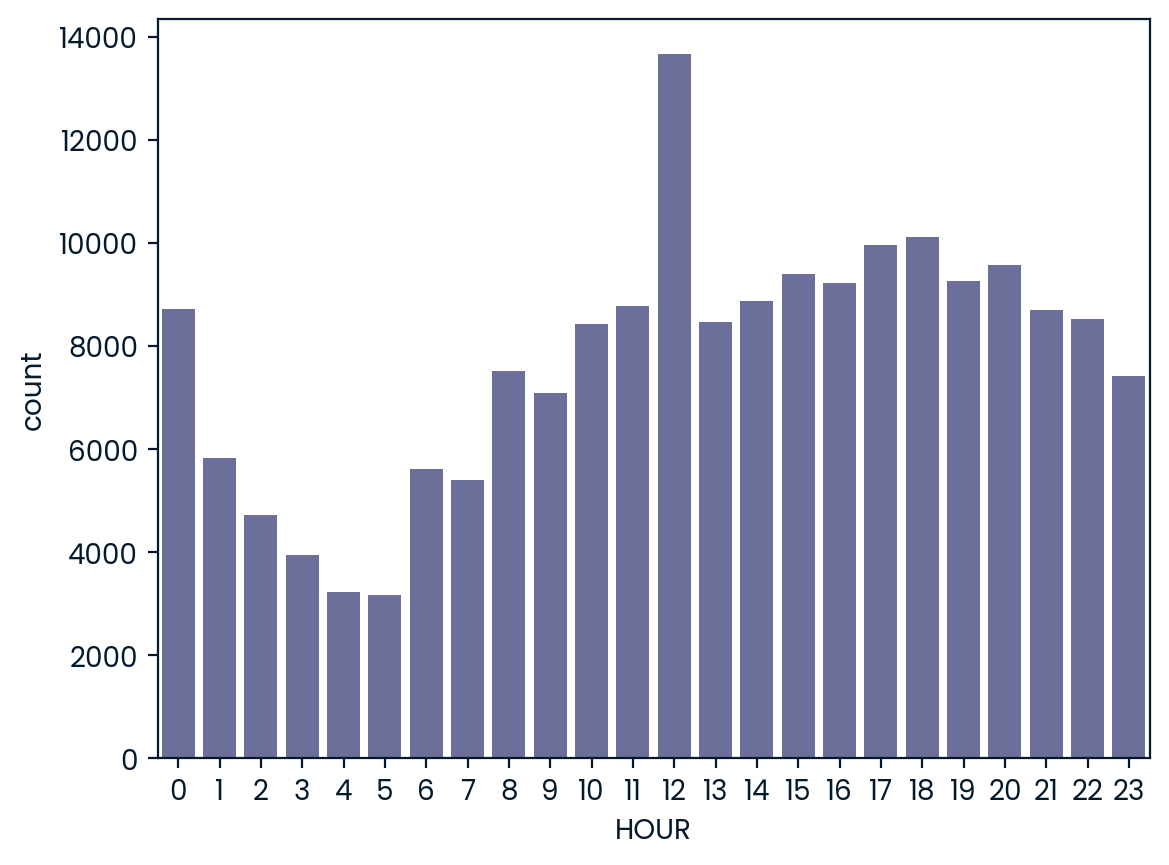

In [59]:
sns.countplot(data=crimes, x='HOUR')
plt.show()

In [60]:
peak_crime_hour = 12

Filtering for night time.

In [61]:
night_crimes = crimes[(crimes['TIME OCC'] >= 2200) | (crimes['TIME OCC'] < 400)]
night_crimes['AREA NAME'].value_counts().head()

Central        3312
Hollywood      2699
77th Street    2558
Southwest      2347
Southeast      2218
Name: AREA NAME, dtype: int64

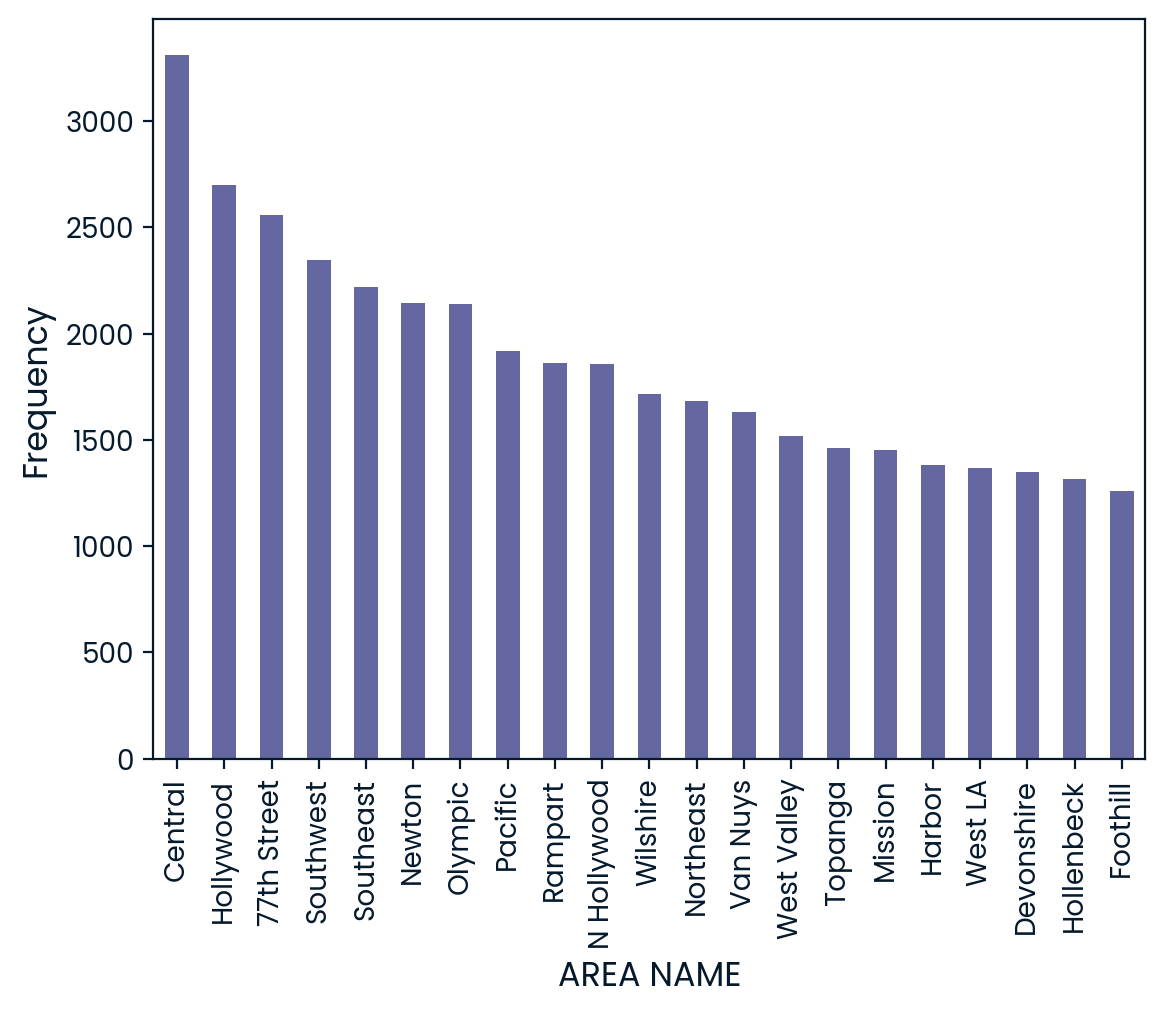

In [62]:
df = night_crimes['AREA NAME'].value_counts().to_frame()
fig, ax = plt.subplots()
ax = df['AREA NAME'].plot(kind='bar')
ax.set_xlabel('AREA NAME', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [63]:
peak_night_crime_location = 'Central'

Write a function to classify victim ages.

In [64]:
def vict_ages(x):
    if 0 <= x <= 17:
        return "0-17"
    elif 18 <= x <= 25:
        return "18-25"
    elif 26 <= x <= 34:
        return "26-34"
    elif 35 <= x <= 44:
        return "35-44"
    elif 45 <= x <= 54:
        return "45-54"
    elif 55 <= x <= 64:
        return "55-64"
    else:
        return "65+"

Apply the function and validate.

In [65]:
crimes['AGE RANGES'] = crimes['Vict Age'].apply(vict_ages)
crimes[['Vict Age', 'AGE RANGES']].head()

,Vict Age,AGE RANGES
0,27,26-34
1,60,55-64
2,28,26-34
3,37,35-44
4,79,65+


Identify the number of crimes committed against victims of different age groups.

In [66]:
victim_ages = crimes.groupby('AGE RANGES')['Crm Cd Desc'].count()
victim_ages

AGE RANGES
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Crm Cd Desc, dtype: int64